Відрізок 1:
S_0(x) = 3.18 + -7.8781(x - 0.8) + 0.0(x - 0.8)^2 + 33.1441(x - 0.8)^3, x належить [0.8, 1.2]
Відрізок 2:
S_1(x) = 2.15 + 8.0311(x - 1.2) + 39.773(x - 1.2)^2 + -145.893(x - 1.2)^3, x належить [1.2, 1.4]
Відрізок 3:
S_2(x) = 4.18 + 6.4332(x - 1.4) + -47.7628(x - 1.4)^2 + 74.0263(x - 1.4)^3, x належить [1.4, 1.7]
Відрізок 4:
S_3(x) = 3.81 + -3.7669(x - 1.7) + 18.8608(x - 1.7)^2 + 12.5739(x - 1.7)^3, x належить [1.7, 2.2]
Значення сплайна:
x = 0.80, y = 3.180
x = 0.81, y = 2.804
x = 0.83, y = 2.463
x = 0.84, y = 2.156
x = 0.86, y = 1.883
x = 0.87, y = 1.641
x = 0.88, y = 1.429
x = 0.90, y = 1.247
x = 0.91, y = 1.093
x = 0.93, y = 0.967
x = 0.94, y = 0.865
x = 0.96, y = 0.789
x = 0.97, y = 0.736
x = 0.98, y = 0.705
x = 1.00, y = 0.695
x = 1.01, y = 0.706
x = 1.03, y = 0.734
x = 1.04, y = 0.781
x = 1.05, y = 0.843
x = 1.07, y = 0.921
x = 1.08, y = 1.012
x = 1.10, y = 1.117
x = 1.11, y = 1.233
x = 1.13, y = 1.359
x = 1.14, y = 1.494
x = 1.15, y = 1.638
x = 1.17, y = 1.788
x = 1.1

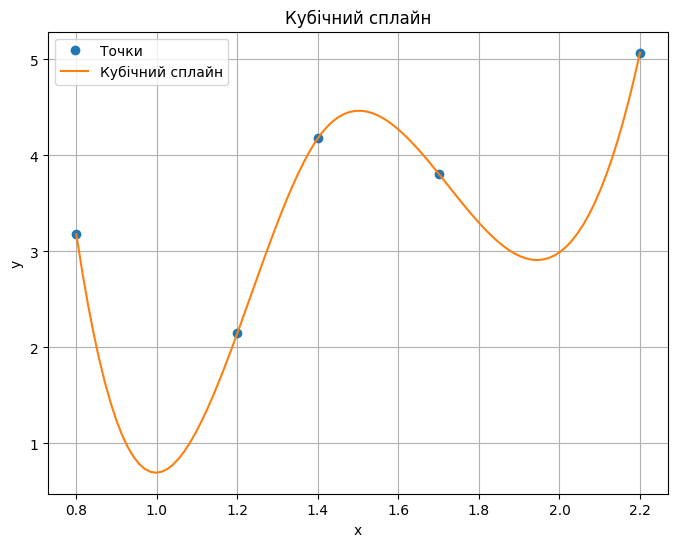

In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = np.array([0.8, 1.2, 1.4, 1.7, 2.2])
y = np.array([3.18, 2.15, 4.18, 3.81, 5.07])
n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])
l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)
for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
c[n-1] = (alpha[n-1] - h[n-2] * z[n-2]) / (2 * (h[n-2] + mu[n-1]))
b[n-1] = (a[n] - a[n-1]) / h[n-1] - h[n-1] * (2 * c[n-1] + c[n-2]) / 3
d[n-1] = (c[n-1] - c[n-2]) / (3 * h[n-1])
for j in range(n - 2, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")
cs = CubicSpline(x, y)
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)
print("Значення сплайна:")
for i in range(len(x_new)):
 print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()
